In [2]:
import pandas as pd
import numpy as np

from data_inspection import DataInspector, InspectingDatatypesStrategy, InspectingSummaryStatistics
from missing_values_analysis import MissingValuesReport
from univariate_analysis import UnivariateAnalysisExecutor, UnivariateNumericalAnalysis, UnivariateCategoricalAnalysis
from bivariate_analysis import BivariateAnalysisExecutor, NumericalWithNumericalAnalysis, CategoricalWithNumericalAnalysis
from multivariate_analysis import SimpleMultivariateStatisticalAnalysis


In [3]:
data_path = '../data_source/laptop_data.xlsx'
df = pd.read_excel(data_path)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [5]:
data_inspector = DataInspector(InspectingDatatypesStrategy())
data_inspector.run_inspection(df)


Count of data types and non-null elements:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB
None


In [6]:
data_inspector.configure_strategy(InspectingSummaryStatistics())
data_inspector.run_inspection(df)


Statistical Summary of numerical features:
       Unnamed: 0       Inches          Price
count  1303.00000  1303.000000    1303.000000
mean    651.00000    15.017191   59870.042910
std     376.28801     1.426304   37243.201786
min       0.00000    10.100000    9270.720000
25%     325.50000    14.000000   31914.720000
50%     651.00000    15.600000   52054.560000
75%     976.50000    15.600000   79274.246400
max    1302.00000    18.400000  324954.720000

Categorical Summary of features:
       Company  TypeName   ScreenResolution                         Cpu   Ram  \
count     1303      1303               1303                        1303  1303   
unique      19         6                 40                         118     9   
top       Dell  Notebook  Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
freq       297       727                507                         190   619   

           Memory                    Gpu       OpSys Weight  
count        1303                   1303

# Data Inspection Report - `laptop_data.xlsx`

## 1. Dataset Overview
- **File Path:** `../data_source/laptop_data.xlsx`
- **Number of Rows:** 1303
- **Number of Columns:** 12
- **Target Variable:** `Price`
- **Index Column:** `Unnamed: 0` (auto-generated, can be dropped)
- **Purpose:** Analysis and modeling of laptop prices based on specifications.

---

## 2. Data Types and General Observations
- **Numerical Features:** `Unnamed: 0`, `Inches`, `Price`
- **Categorical Features:** `Company`, `TypeName`, `ScreenResolution`, `Cpu`, `Ram`, `Memory`, `Gpu`, `OpSys`, `Weight`
- **Missing Values:** None detected - dataset is complete.
- **Duplicates:** None detected.

---

## 3. Numerical Feature Summary
- **Unnamed: 0:** Auto-generated index, spans 0–1302.
- **Inches (Screen Size):** Mean ~15 inches, standard deviation ~1.43. Values range from 10.1 to 18.4 inches, mostly clustered around 14–16 inches.
- **Price:** Mean ~59,870 INR, standard deviation ~37,243 INR. Range from ~9,270 INR to ~324,955 INR. Distribution is right-skewed; some high-priced outliers exist.

---

## 4. Categorical Feature Summary
- **Company:** 19 unique manufacturers; most frequent brand is Dell (297 entries).
- **TypeName:** 6 types, dominated by Notebook (727 entries).
- **ScreenResolution:** 40 unique resolutions; Full HD 1920x1080 is most common (507 entries).
- **CPU:** 118 unique CPU models; Intel Core i5 7200U 2.5GHz is most frequent.
- **RAM:** 9 unique capacities; 8GB is most common (619 entries).
- **Memory:** 39 types; 256GB SSD is most common (412 entries).
- **GPU:** 110 unique GPUs; Intel HD Graphics 620 is most frequent (281 entries).
- **Operating System (OpSys):** 9 types; Windows 10 dominates (1,072 entries).
- **Weight:** 179 unique values; 2.2kg is most common (121 entries).

---

## 5. Key Observations & Recommendations
1. **Data Quality:** Dataset is clean, with no missing or duplicate values.
2. **Skewness:** `Price` has a heavy right tail; consider log-transform for modeling.
3. **Feature Engineering:** 
   - Extract numeric weight from the `Weight` column for modeling.
   - Extract CPU brand/generation from `Cpu`.
   - Extract SSD/HDD and capacity from `Memory`.
4. **Categorical Encoding:** Several high-cardinality features (e.g., `Cpu`, `Gpu`) may require target encoding or embeddings for machine learning.
5. **Outlier Handling:** Extreme `Price` values may need investigation depending on modeling strategy.

---

**Conclusion:**  
The dataset is well-structured and ready for preprocessing, feature engineering, and modeling. Care should be taken with high-cardinality categorical features and skewed numerical distributions.



In [7]:
missing_values_processor = MissingValuesReport()
missing_values_processor.missing_values_analysis(df)


Missing Values Count by Column:
No missing values found.

No missing values to visualize.


## Missing Values Report

- There are 1303 records and no **missing values** found
- The dataset is completely clean and there will be no need of any other additional strategies to be performed on the dataset in case of missing data values

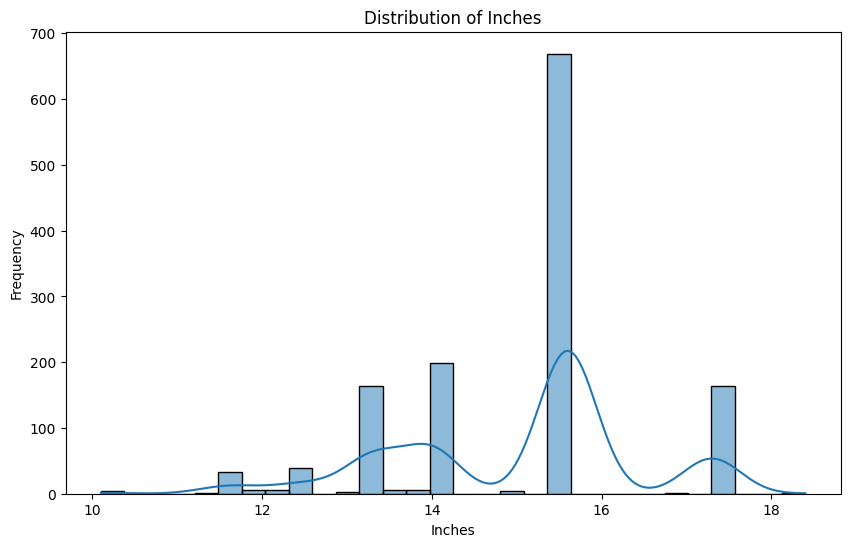

In [8]:
univariate_processor = UnivariateAnalysisExecutor(UnivariateNumericalAnalysis())
univariate_processor.run_analysis(df, 'Inches')

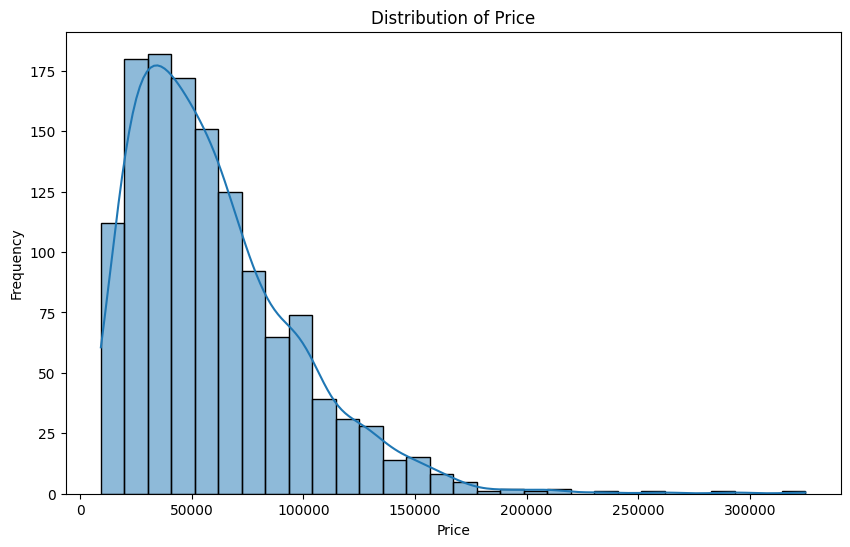

In [9]:
univariate_processor.run_analysis(df, 'Price')

c:\Users\kanak\OneDrive\文档\Personal Projects\laptop-price-prediction\data_analysis\univariate_analysis.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


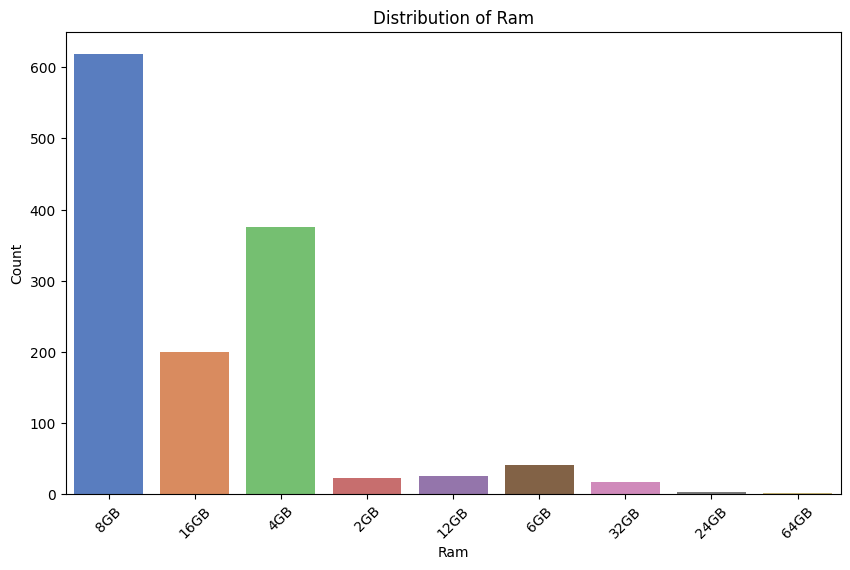

In [10]:
univariate_processor.configure_strategy(UnivariateCategoricalAnalysis())
univariate_processor.run_analysis(df, 'Ram')

c:\Users\kanak\OneDrive\文档\Personal Projects\laptop-price-prediction\data_analysis\univariate_analysis.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


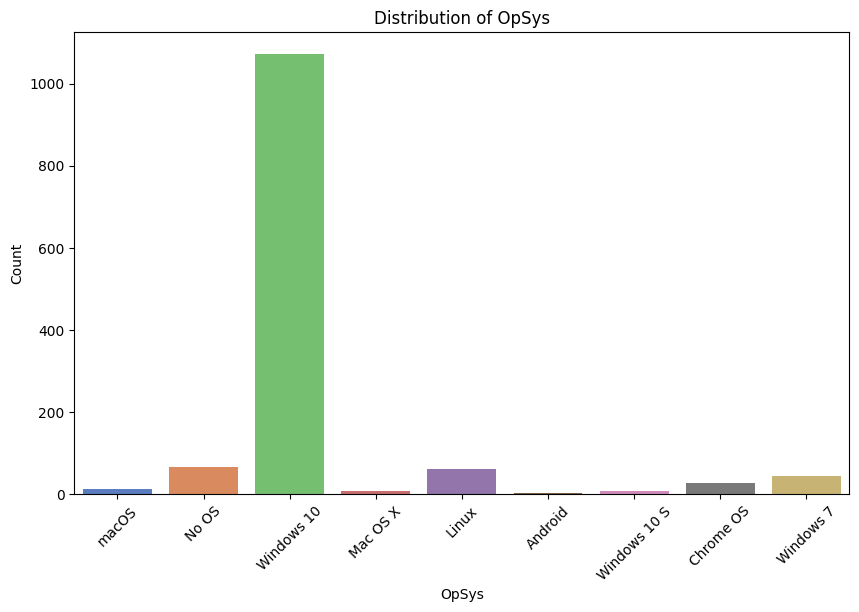

In [11]:
univariate_processor.run_analysis(df, 'OpSys')

### Data Preprocessing

Since some columns are in an **unstructured format**, we will perform **data preprocessing** to clean, transform, and standardize the dataset before analysis.  

`data_source/laptop_data_preprocessed.xlsx`

In [12]:
data_path = '../data_source/laptop_data_preprocessed.csv'
df_preprocessed = pd.read_csv(data_path)
df_preprocessed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  1303 non-null   int64  
 1   Unnamed: 0    1303 non-null   int64  
 2   Company       1303 non-null   object 
 3   TypeName      1303 non-null   object 
 4   Cpu           1303 non-null   object 
 5   Ram           1303 non-null   int64  
 6   Memory        1303 non-null   object 
 7   Gpu           1303 non-null   object 
 8   OpSys         1303 non-null   object 
 9   Weight        1303 non-null   float64
 10  Price         1303 non-null   int64  
 11  Touchscreen   1303 non-null   int64  
 12  IPS           1303 non-null   int64  
 13  Cpu Name      1303 non-null   object 
 14  ppi           1303 non-null   float64
dtypes: float64(2), int64(6), object(7)
memory usage: 152.8+ KB


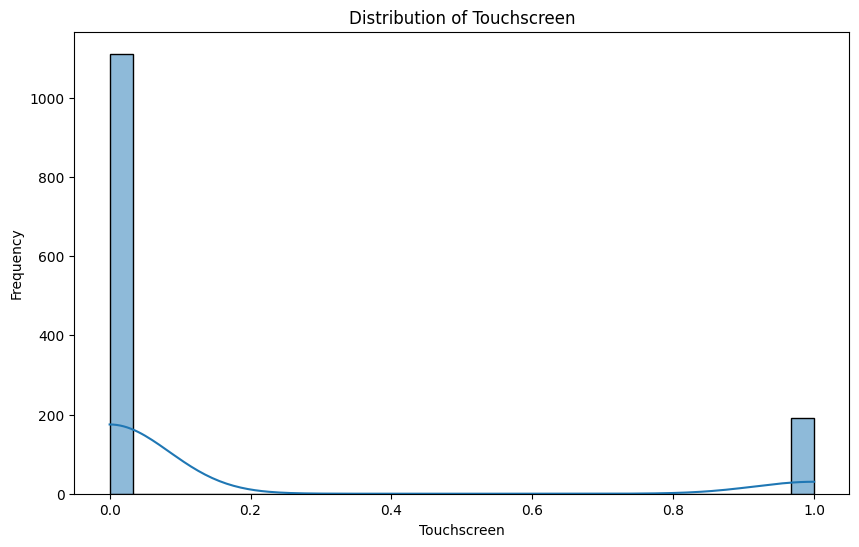

In [13]:
univariate_processor.configure_strategy(UnivariateNumericalAnalysis())
univariate_processor.run_analysis(df_preprocessed, 'Touchscreen')

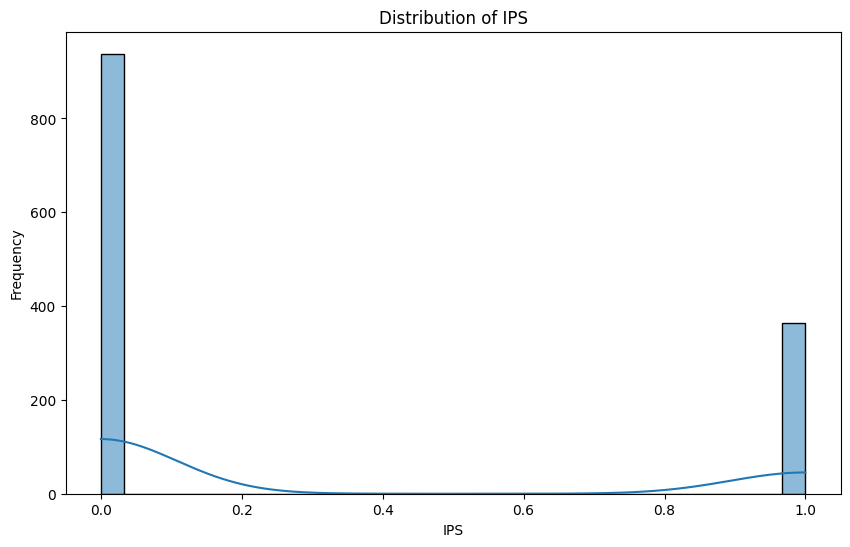

In [14]:
univariate_processor.configure_strategy(UnivariateNumericalAnalysis())
univariate_processor.run_analysis(df_preprocessed, 'IPS')

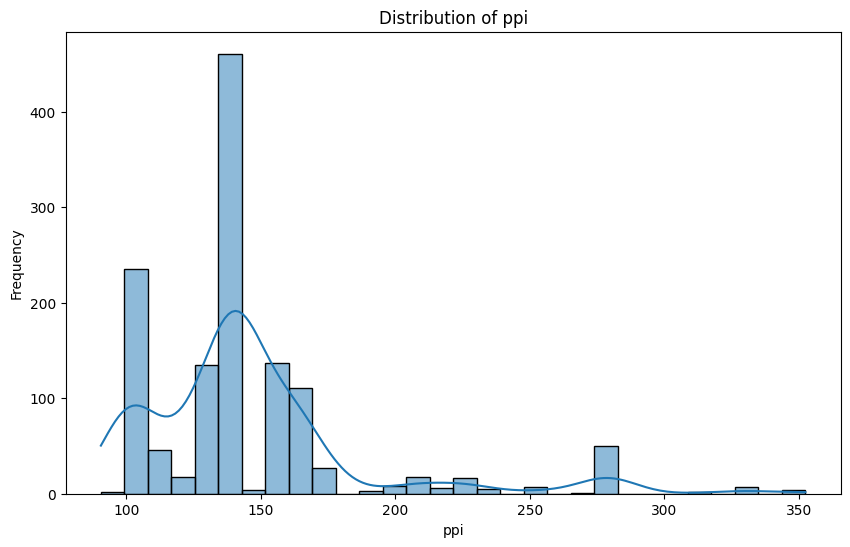

In [15]:
univariate_processor.configure_strategy(UnivariateNumericalAnalysis())
univariate_processor.run_analysis(df_preprocessed, 'ppi')

c:\Users\kanak\OneDrive\文档\Personal Projects\laptop-price-prediction\data_analysis\univariate_analysis.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


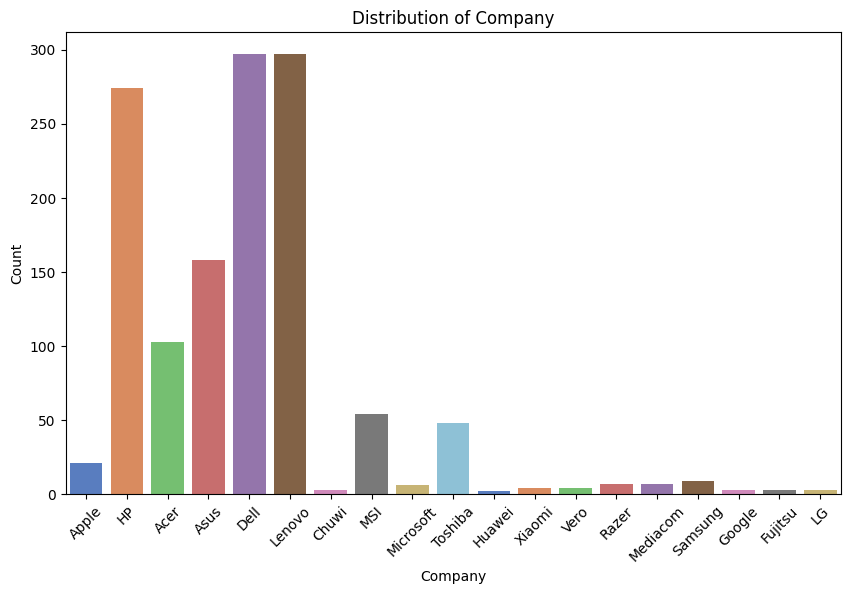

In [16]:
univariate_processor.configure_strategy(UnivariateCategoricalAnalysis())
univariate_processor.run_analysis(df, 'Company')

c:\Users\kanak\OneDrive\文档\Personal Projects\laptop-price-prediction\data_analysis\univariate_analysis.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


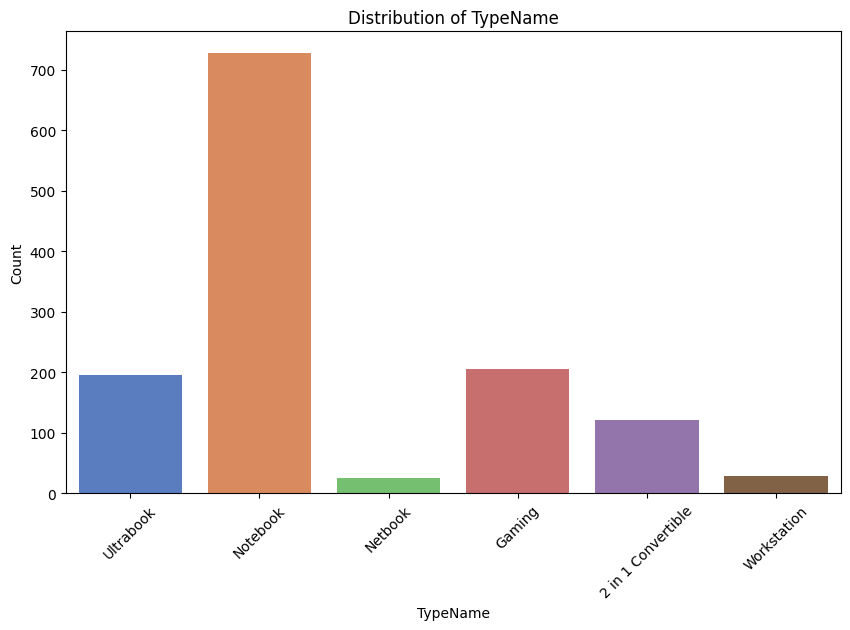

In [17]:
univariate_processor.run_analysis(df, 'TypeName')

# Univariate Analysis Report

This report summarizes the distribution of key features in the laptop dataset, providing insights into feature patterns and potential modeling implications.

---

## 1. Screen Size (Inches)
- **Observation:**  
  - 15–16 inches: highest frequency with approximately 680 devices.  
  - Extremes like 10 inches and 18 inches have the lowest counts.  

- **Implication for modeling:**  
  - Most devices cluster around mid-sized screens; extreme values are rare and may have limited influence on predictive models.  
  - Consider normalization or binning if using as a continuous feature to reduce skew.

---

## 2. Price
- **Observation:**  
  - Most laptops are priced between ₹30,000–₹50,000.  
  - Very few devices are priced between ₹200,000–₹300,000.  

- **Implication for modeling:**  
  - Price distribution is right-skewed; rare high-end devices may affect regression models.  
  - Log transformation could stabilize variance for predictive modeling.

---

## 3. RAM
- **Observation:**  
  - 8 GB RAM is most common with ~600 records.  
  - Rare configurations like 2 GB, 6 GB, 12 GB, 24 GB, 32 GB, and 64 GB are much lower in frequency.  

- **Implication for modeling:**  
  - Imbalanced categorical distribution may bias models if not handled properly.  
  - Consider grouping rare RAM sizes into an “Other” category for categorical encoding.

---

## 4. Touchscreen
- **Observation:**  
  - Non-touchscreen devices: ~1,000+ records.  
  - Touchscreen devices: ~300 records.  

- **Implication for modeling:**  
  - Significant class imbalance; may need oversampling or weighting if predicting touchscreen as target.  

---

## 5. IPS Display
- **Observation:**  
  - `0.0` IPS: over 1,000 records.  
  - `1.0` IPS: ~400 records.  

- **Implication for modeling:**  
  - Categorical imbalance may influence feature importance in tree-based models.  
  - Can be treated as a binary variable for classification/regression tasks.

---

## 6. Pixels Per Inch (PPI)
- **Observation:**  
  - Approximately 500 devices fall near 140 PPI.  
  - PPI range 200–350 has comparatively fewer devices.  

- **Implication for modeling:**  
  - Mid-range PPI values are rare; extreme low/high PPI may dominate predictions if not standardized.  
  - Can consider scaling or binning for numerical stability.

---

## 7. Company
- **Observation:**  
  - HP, Dell, Lenovo: highest counts (~270 devices each).  
  - Acer, Asus: next highest (~140–150 devices).  
  - MSI, Toshiba: ~50 devices.  
  - Remaining brands: <30 devices.  

- **Implication for modeling:**  
  - Strong imbalance; rare brands may contribute little predictive power.  
  - Could group rare brands as "Other" to reduce sparsity in one-hot encoding.

---

## 8. Type Name
- **Observation:**  
  - Notebook: ~700 devices (dominant type).  
  - Ultrabook, Gaming, 2-in-1 Convertible: >200 each.  
  - Notebook and Workstation: <20 devices.  

- **Implication for modeling:**  
  - Imbalance between types may bias models toward the dominant class.  
  - Consider combining very rare types into an "Other" category or using target encoding.

---

## Modeling Impact Summary
1. **Imbalanced distributions:** Many features (RAM, touchscreen, company, type) show skewed distributions, which can bias models.  
2. **Skewed numerical variables:** Price and PPI distributions may require transformation or scaling for regression models.  
3. **Rare categories:** Features with rare values (high-end RAM, brands, screen extremes) may need grouping to reduce sparsity in categorical encoding.  
4. **Feature importance:** Dominant categories may disproportionately influence models; careful preprocessing is needed to ensure fair representation.  

**Recommendation:**  
- Use normalization or log transformation for skewed numeric features.  
- Group rare categories to avoid sparse encoding issues.  
- Consider balancing techniques for classification tasks where categorical imbalance is severe.  


### Bivariate Analysis

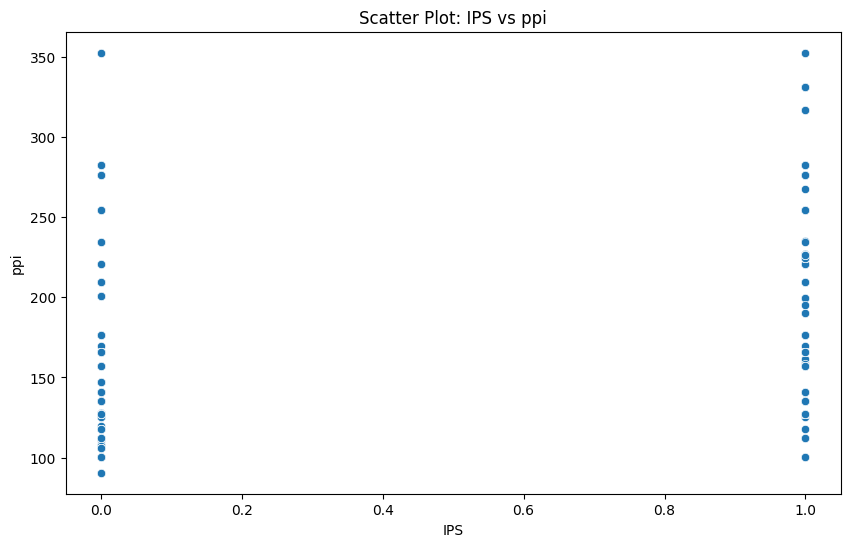

In [29]:
bivariate_processor = BivariateAnalysisExecutor(NumericalWithNumericalAnalysis())
bivariate_processor.run_analysis(df_preprocessed, 'IPS', 'ppi')

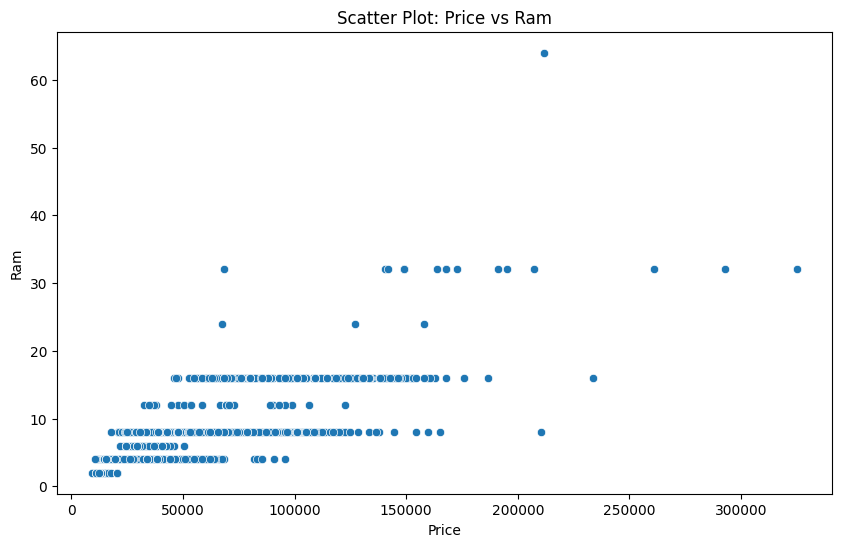

In [31]:
bivariate_processor.run_analysis(df_preprocessed, 'Price', 'Ram')

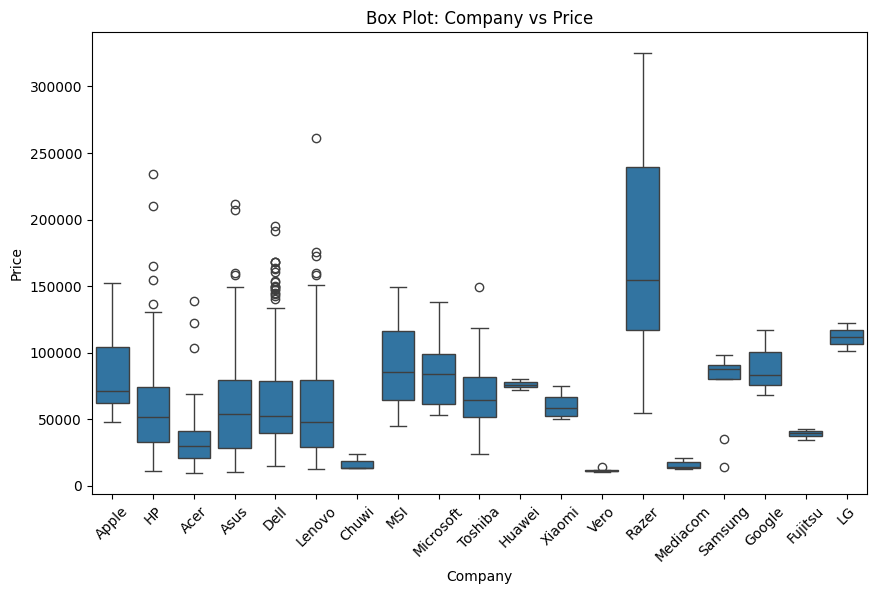

In [ ]:
bivariate_processor.configure_strategy(CategoricalWithNumericalAnalysis())
bivariate_processor.run_analysis(df_preprocessed, 'Company', 'Price')

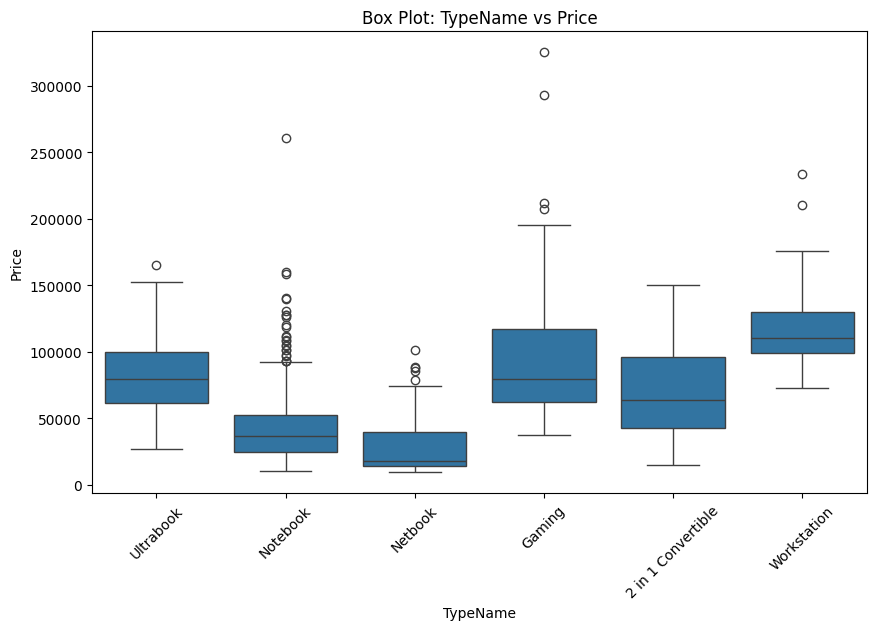

In [ ]:
bivariate_processor.run_analysis(df_preprocessed, 'TypeName', 'Price')

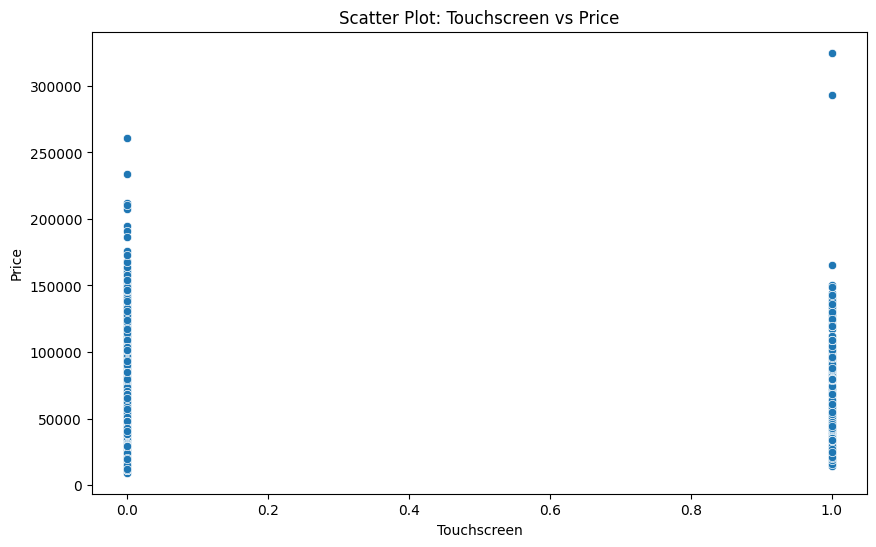

In [33]:
bivariate_processor.run_analysis(df_preprocessed, 'Touchscreen', 'Price')

# Bivariate Analysis Report and Modeling Impact

This report summarizes the relationships between pairs of variables shown in the plots and discusses their implications for a laptop price prediction model.

---

## 1. Company vs. Price

**Plot Type:** Box Plot



**Analysis:**
The distribution of **Price** varies significantly across different **Company** brands.

* **Razer** shows the **highest median price** and the largest Interquartile Range (IQR), indicating it targets the high-end market with variable pricing.
* **Apple** also commands a high median price but has a tighter, high-end distribution.
* **Acer**, **Chuwi**, **Xiaomi**, and **Mediacom** clearly dominate the low-price/budget segment.
* **Lenovo** and **Dell** exhibit the widest total range (including outliers), confirming they serve the full spectrum of the market from budget to premium.

**Impact in Modeling:**
* **High Impact:** **Company** is a critical **categorical feature** and a strong predictor of price.
* **Action:** Must be included in the model, likely requiring **one-hot encoding** or a similar technique to capture the high positive price influence of brands like Razer and Apple, and the negative influence of budget brands.

---

## 2. Laptop Type vs. Price

**Plot Type:** Box Plot



**Analysis:**
The laptop **Type** is a powerful differentiator for **Price**.

* **Gaming** laptops and **Workstations** have the **highest median prices** and the largest IQR, confirming their status as premium, performance-focused categories.
* **Netbooks** are the clear budget category with the **lowest median price** and minimal price variability.
* **Notebooks** have a low median price but many high-price outliers, suggesting this broad category contains both budget and high-spec models.

**Impact in Modeling:**
* **High Impact:** **Laptop Type** is another essential **categorical feature** for predicting price.
* **Action:** Must be included in the model. The model will assign large positive weights to "Gaming" and "Workstation" and a large negative weight to "Netbook".

---

## 3. Price vs. Ram

**Plot Type:** Scatter Plot



**Analysis:**
There is a clear **positive relationship** between **Ram** (in GB) and **Price**.

* Laptops with **higher Ram** (e.g., $16\text{GB}, 32\text{GB}, 64\text{GB}$) are generally associated with **higher prices**.
* Laptops with **$8\text{GB}$ Ram** cover the **widest price range**, suggesting $8\text{GB}$ is the most common configuration across all market segments.
* The absolute highest-priced laptops are exclusively in the high-Ram tiers ($\ge 16\text{GB}$).

**Impact in Modeling:**
* **High Impact:** **Ram** is a crucial **numerical/ordinal feature**.
* **Action:** Include $\text{Ram}$ as a **numerical feature**. Considering its discrete steps and the potential non-linear price jump (e.g., $8\text{GB}$ to $16\text{GB}$), an alternative approach could be to treat it as an **ordinal feature** or apply a log transformation to the price or Ram if the relationship is non-linear.

---

## 4. Touchscreen vs. Price

**Plot Type:** Scatter Plot



**Analysis:**
The plot compares $\text{Price}$ for non-touchscreen ($\text{Touchscreen}=0$) and touchscreen ($\text{Touchscreen}=1$) laptops.

* The **highest-priced laptops** (above $\approx 290,000$) are exclusively **touchscreen** models.
* However, both groups have a very wide price distribution, with most data points clustered below $\approx 150,000$.

**Impact in Modeling:**
* **Moderate Impact:** **Touchscreen** is a key **binary feature** for capturing the **premium price ceiling**.
* **Action:** Include $\text{Touchscreen}$ as a binary (0/1) feature. It will likely receive a small positive coefficient, with its main role being to enable the model to predict the extreme high-end prices when combined with other premium features (like high Ram/Razer brand).

---

## 5. IPS vs. ppi (Pixels Per Inch)

**Plot Type:** Scatter Plot



**Analysis:**
This plot shows the relationship between screen panel type ($\text{IPS}$) and pixel density ($\text{ppi}$).

* Both non-IPS and IPS screens cover a **nearly identical and wide range of ppi values** ($\approx 90$ to $\approx 350$).
* There is no discernible difference in the distribution of pixel density based on the $\text{IPS}$ flag.

**Impact in Modeling:**
* **Low Direct Impact:** The relationship between $\text{IPS}$ and $\text{ppi}$ is weak and offers little information for predicting price based on their interaction.
* **Action:** Include **$\text{IPS}$** and **$\text{ppi}$** as **independent features** in the model. $\text{ppi}$ (as a numerical measure of display quality) might have a positive, independent impact on Price, and $\text{IPS}$ (as a binary quality indicator) might also have a small, independent positive impact.

## Multivariate Analysis


### Multivariate Feature Selection Rationale

Since the dataset contains both **numerical** and **categorical** features, it is important to focus on the subset of features that contain **only numerical values**.  
By selecting purely numeric features, we ensure a **consistent and reliable basis** for performing multivariate statistical analysis.  

This approach eliminates encoding bias from categorical variables and enables meaningful computation of statistical measures such as **correlation**, **covariance**, and **pairwise scatter relationships** between features.

`data_source/laptop_data_features.csv`


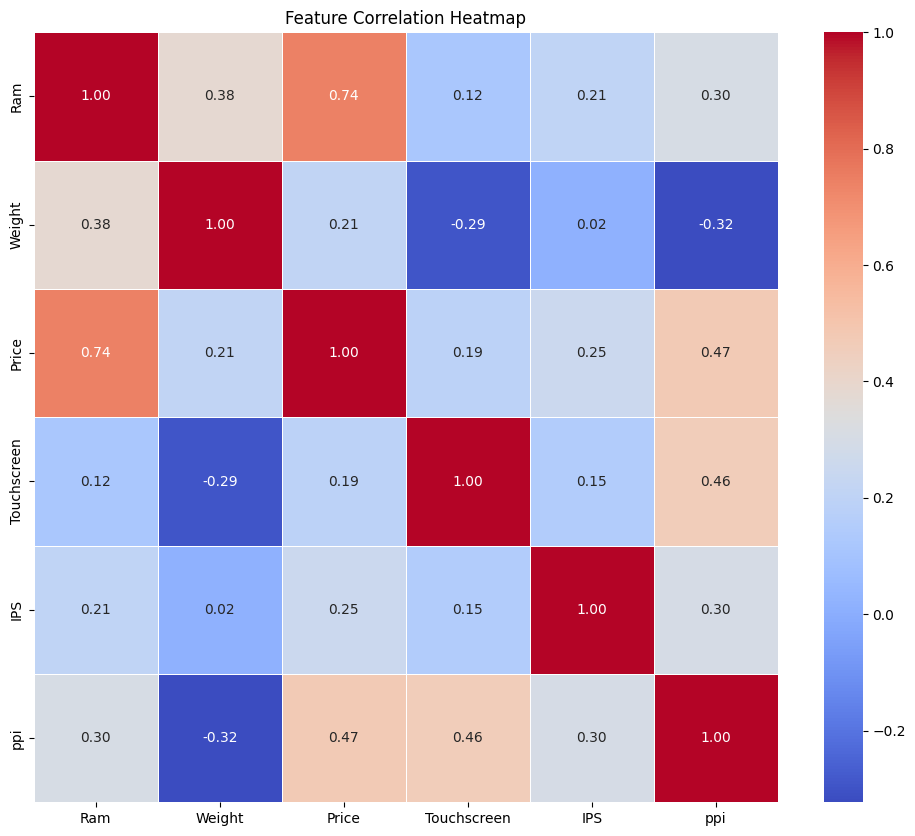

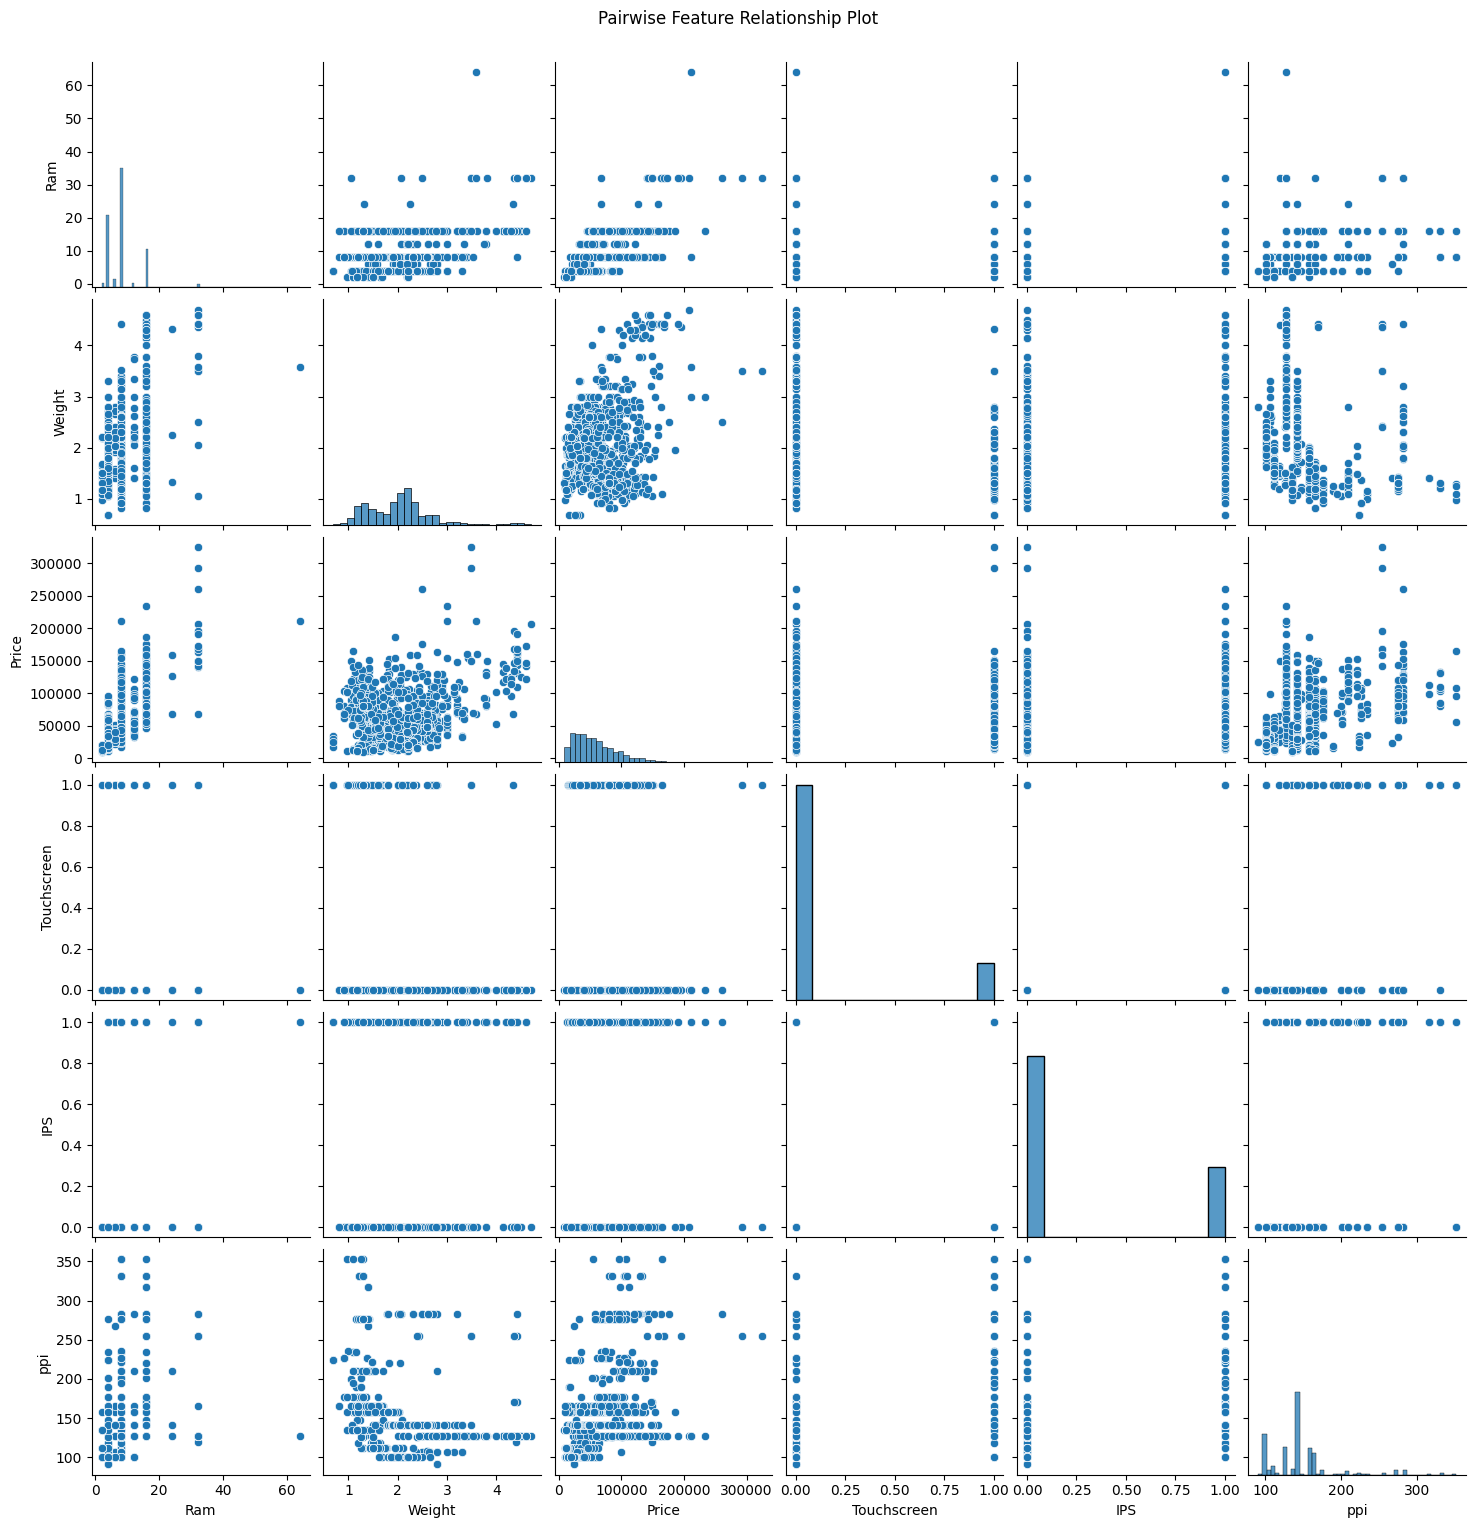

In [38]:
multivariate_processor = SimpleMultivariateStatisticalAnalysis()
selected_features = df_preprocessed[['Company', 'TypeName', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Touchscreen', 'IPS', 'Cpu Name', 'ppi']]
multivariate_processor.render(selected_features)